In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("HealthCareAnalytics.csv")

In [32]:
df = pd.DataFrame(data)

In [33]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [34]:
df.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,Nov-20,4752,0-10


In [35]:
df.shape

(318438, 18)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [37]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


**case_id** & **patientid** columns don't add any usefulness to building a model, so it's better to drop these columns.

## EDA

In [38]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [39]:
df_new = df.copy()

In [40]:
# dropping case_id & patientid columns

df_new.drop(['case_id','patientid'], axis=1, inplace=True)

In [41]:
df_new.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [42]:
# check the distribution of target classes

df_new.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

<AxesSubplot:xlabel='Stay', ylabel='count'>

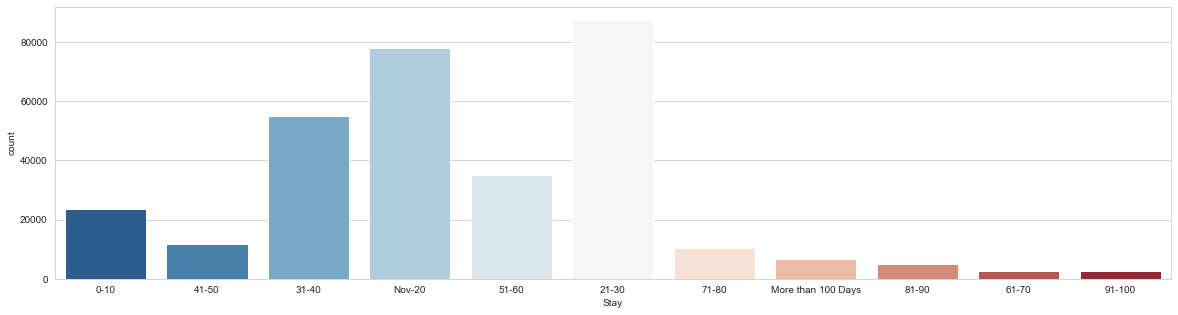

In [43]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.countplot(x='Stay',data=df_new,palette='RdBu_r')

The **data is imbalanced** as the target classes have a lot of variations. Hence, to understand the performance of the model we'll build for this use case, instead of accuracy, metrics such as recall, precision, f1 score & roc_auc score needs to be considered. This will be covered below.

In [44]:
# list of numerical variables
numerical_features = [feature for feature in df_new.columns if df_new[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_new[numerical_features].head()

Number of numerical variables:  7


,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
0,8,3,3,2.0,7.0,2,4911
1,2,5,2,2.0,7.0,2,5954
2,10,1,2,2.0,7.0,2,4745
3,26,2,2,2.0,7.0,2,7272
4,26,2,2,2.0,7.0,2,5558


Numerical variables are usually of 2 type:
1. Continuous variable
2. Discrete Variables

In [45]:
# Discrete variable
discrete_feature=[feature for feature in numerical_features if len(df_new[feature].unique())<50]
print("Discrete Variables Count: ", len(discrete_feature))

# considering 50 as a threshold of no. of unique values in a column

Discrete Variables Count:  6


In [46]:
discrete_feature

['Hospital_code',
 'City_Code_Hospital',
 'Available_Extra_Rooms_in_Hospital',
 'Bed_Grade',
 'City_Code_Patient',
 'Visitors_with_Patient']

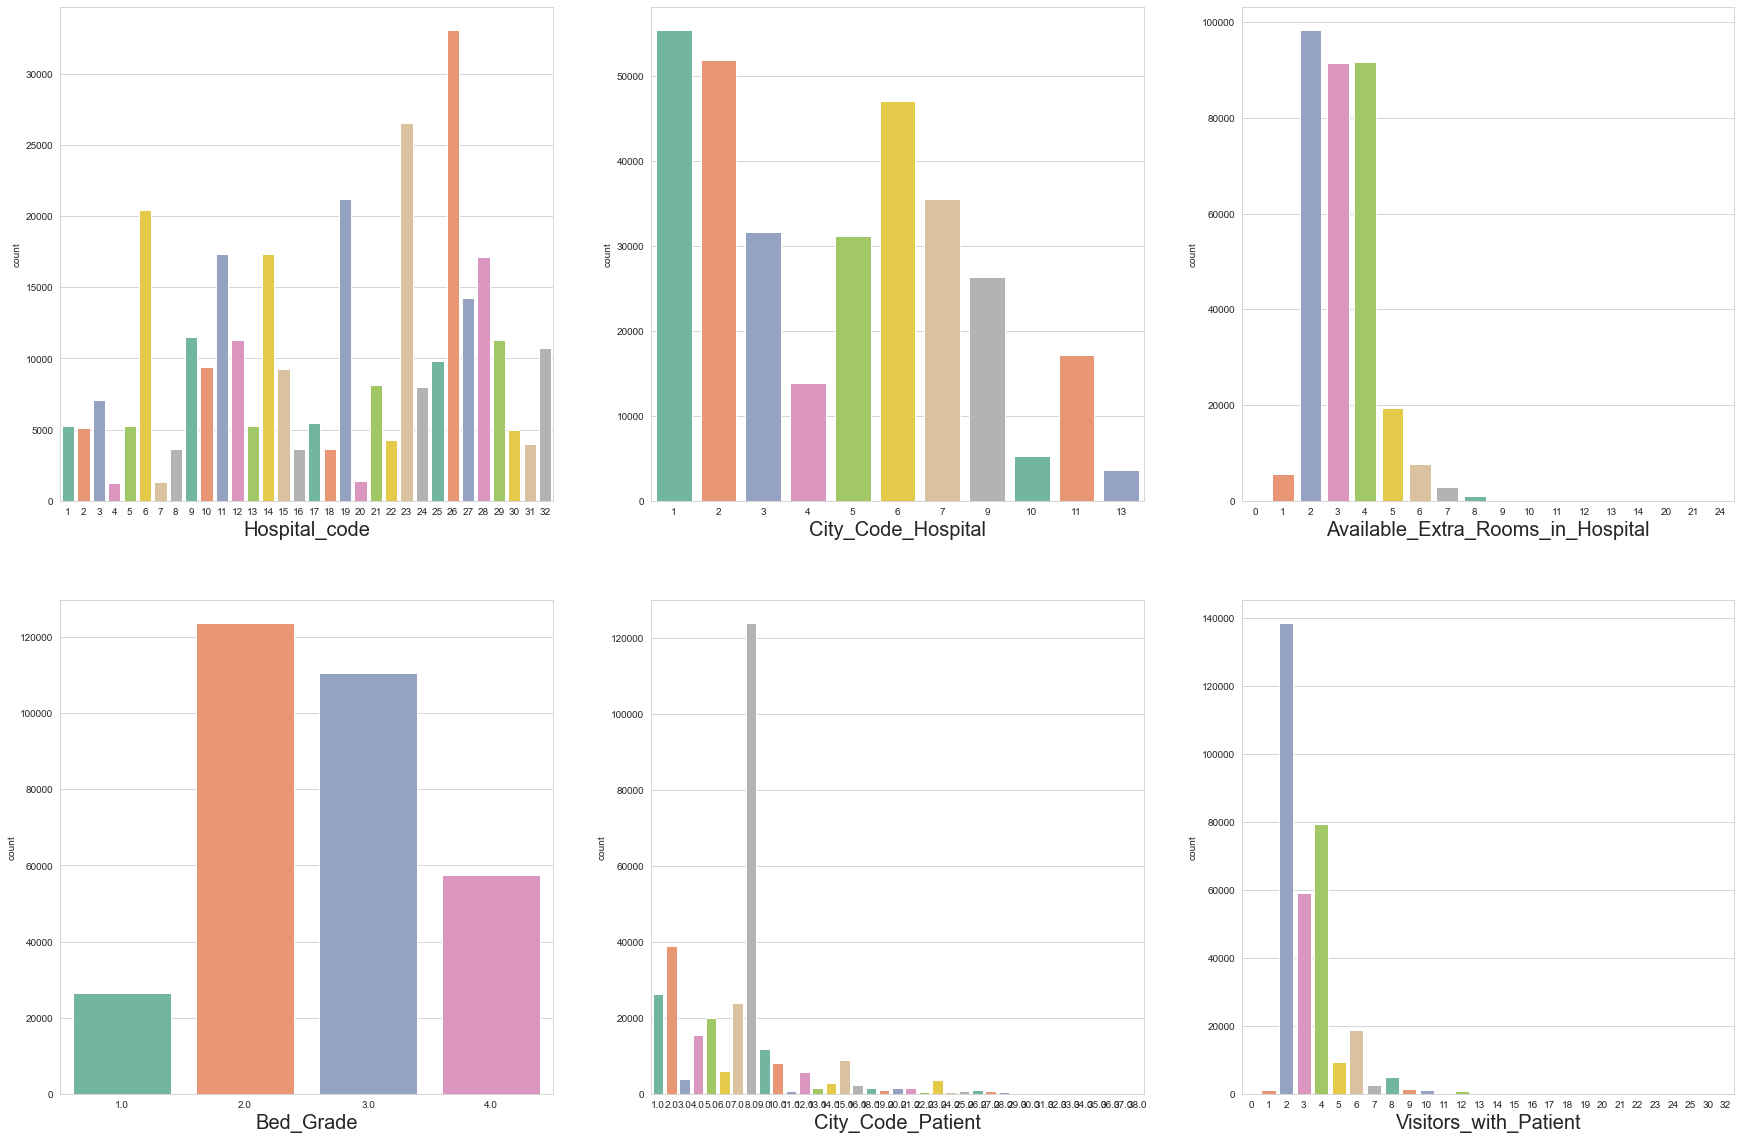

In [47]:
## Analyzing the discrete features

plt.figure(figsize=(30,20))
plotnumber = 1

for feature in discrete_feature:
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        sns.countplot(x=feature, data=df_new, palette="Set2")
        plt.xlabel(feature,fontsize=20)
    plotnumber+=1
plt.show()

#### Insights from the graph
1. Available extra rooms: 2-4 are majority of the occurrences.
2. Bed grade: 2, 3 & 4 are the majority occurrences.
3. Visitors with patient: majority of the times patients are visited by 2-4 visitors
4. City code patient with code 8 has the major occurrences.

In [48]:
# continuous variables

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count ", len(continuous_feature))

Continuous feature Count  1


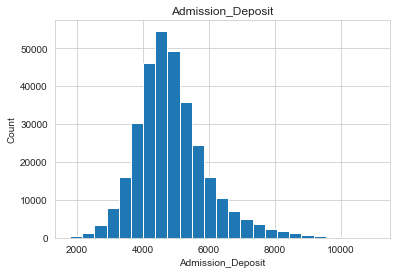

In [49]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df_new[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Insights from the graph
1. The feature shows normal distribution.
2. The majority count of admission deposit is in the range of 4000-6000

In [50]:
## Check the categorical features
# to get the unique values from all the columns with dtype=object--> checking cardinality

def get_categorical_uniques(df_new):
    categorical_columns = [column for column in df_new.dtypes.index if df_new.dtypes[column] == 'object'] 
    categorical_uniques = {column: df_new[column].unique() for column in categorical_columns}
    
    return categorical_uniques

categorical_uniques = get_categorical_uniques(df_new)
categorical_uniques

{'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object),
 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
 'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 'Type_of_Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity_of_Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        'Nov-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [51]:
print("Categorical variables ", len(categorical_uniques))

Categorical variables  9


The **"Age"** & **"Stay"** columns have a category with **'Nov-20'** which is incorrect & should be replaced with **'11-20'**.
To avoid data leakage, it's better to first preform data transformations to train & test data separately.
Hence, we need to split the data into train & test data.

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

In [53]:
print(' train: ', train.shape)
print(' test: ', test.shape)

 train:  (254750, 16)
 test:  (63688, 16)


## Train data

In [54]:
# The "Age" & "Stay" columns have a category with 'Nov-20' which is incorrect & should be replaced with '11-20'

train["Age"].replace('Nov-20','11-20',inplace=True)
train["Stay"].replace('Nov-20','11-20',inplace=True)
print('Age: ', train["Age"].unique())
print('Stay: ', train["Stay"].unique())

Age:  ['41-50' '61-70' '21-30' '51-60' '71-80' '31-40' '0-10' '11-20' '81-90'
 '91-100']
Stay:  ['21-30' 'More than 100 Days' '11-20' '61-70' '51-60' '31-40' '0-10'
 '71-80' '41-50' '91-100' '81-90']


The dataset has 9 categorical variables(features) out of which few are nominal type while others are of ordinal type.

## Handling Categorical features
Types of categorical features in this dataset are:

1. **Nominal data** ==> data is not in any order ==> **OneHotEncoder** is used in this case
2. **Ordinal data** ==> data is in order ==> **LabelEncoder** is used in this case

### Label encoding
Features such such **'Type_of_Admission', 'Severity_of_Illness', 'Age'** & **'Stay'** are ordinal data which must be Label encoded

In [55]:
categorical_uniques_train = get_categorical_uniques(train)

In [56]:
categorical_uniques_train['Stay'] = sorted(categorical_uniques_train['Stay'])
categorical_uniques_train['Stay']

['0-10',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100',
 'More than 100 Days']

In [57]:
# converting categories of Stay column into ordered numeric type

stay_mappings_train = {value: index for index, value in enumerate(categorical_uniques_train['Stay'])}
train["Stay"] = train["Stay"].replace(stay_mappings_train)
stay_mappings_train

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

In [58]:
categorical_uniques_train['Age'] = sorted(categorical_uniques_train['Age'])
categorical_uniques_train['Age']

['0-10',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100']

In [59]:
age_mapping_train = {value: index for index, value in enumerate(categorical_uniques_train['Age'])}
train["Age"] = train["Age"].replace(age_mapping_train)
age_mapping_train

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9}

In [60]:
type_adm_mapping_train = {"Trauma":1, "Urgent":2, "Emergency":3}
train["Type_of_Admission"] = train["Type_of_Admission"].replace(type_adm_mapping_train)
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
231676,19,a,7,Y,4,gynecology,Q,C,2.0,8.0,3,Moderate,4,4,6247,2
166821,19,a,7,Y,2,radiotherapy,S,C,1.0,2.0,3,Moderate,6,6,8000,10
70566,26,b,2,Y,2,radiotherapy,R,D,3.0,7.0,3,Extreme,3,2,4987,1
197982,26,b,2,Y,2,gynecology,Q,D,3.0,14.0,1,Moderate,3,6,7210,6
280389,18,d,13,Y,4,radiotherapy,R,B,2.0,8.0,2,Moderate,2,4,3178,5


In [61]:
sev_ill_mapping_train = {"Minor":1, "Moderate":2, "Extreme":3}
train["Severity_of_Illness"] = train["Severity_of_Illness"].replace(sev_ill_mapping_train)
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
231676,19,a,7,Y,4,gynecology,Q,C,2.0,8.0,3,2,4,4,6247,2
166821,19,a,7,Y,2,radiotherapy,S,C,1.0,2.0,3,2,6,6,8000,10
70566,26,b,2,Y,2,radiotherapy,R,D,3.0,7.0,3,3,3,2,4987,1
197982,26,b,2,Y,2,gynecology,Q,D,3.0,14.0,1,2,3,6,7210,6
280389,18,d,13,Y,4,radiotherapy,R,B,2.0,8.0,2,2,2,4,3178,5


## Handling missing values

In [62]:
# checking for null values

train.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                              94
City_Code_Patient                    3654
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [63]:
# filling missing values

train['Bed_Grade']  = train['Bed_Grade'].fillna(train['Bed_Grade'].median())

train['City_Code_Patient']  = train['City_Code_Patient'].fillna(train['City_Code_Patient'].median())

In [64]:
train.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

### One hot encoding
Columns such as **'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type'** & **'Ward_Facility_Code'** seem to have no ordinality. Hence these can be one hot encoded

In [65]:
# converting nominal categorical data to numeric type

def onehot_encode(train,columns):
    for column in columns:
        dummies = pd.get_dummies(train[column])
        train = pd.concat([train,dummies], axis=1)
        train.drop(column, axis=1, inplace=True)
    return train

In [66]:
onehot_columns = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code']

In [67]:
train = onehot_encode(train, onehot_columns)
train.head()

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,...,R,S,T,U,A,B,C,D,E,F
231676,19,7,4,2.0,8.0,3,2,4,4,6247,...,0,0,0,0,0,0,1,0,0,0
166821,19,7,2,1.0,2.0,3,2,6,6,8000,...,0,1,0,0,0,0,1,0,0,0
70566,26,2,2,3.0,7.0,3,3,3,2,4987,...,1,0,0,0,0,0,0,1,0,0
197982,26,2,2,3.0,14.0,1,2,3,6,7210,...,0,0,0,0,0,0,0,1,0,0
280389,18,13,4,2.0,8.0,2,2,2,4,3178,...,1,0,0,0,0,1,0,0,0,0


In [68]:
categorical_uniques_train = get_categorical_uniques(train)
get_categorical_uniques(train)

{}

1. All the features are now converted into numeric type.
2. As this a **classification** problem where we'll be using either Decision Trees, Ensemble techniques or SVM, there's no need for **scaling** the data. 
3. Also there's no need for removing **outliers** since there's no impact of outliers for these algorithms.

# Test data preprocessing
* Applying the same transformations to test data as applied to train data

In [69]:
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
245328,8,c,3,Z,4,gynecology,Q,F,4.0,6.0,Trauma,Minor,4,41-50,4185,51-60
239123,5,a,1,X,6,TB & Chest disease,Q,E,3.0,8.0,Trauma,Extreme,6,41-50,4507,51-60
280646,29,a,4,X,3,gynecology,R,F,2.0,16.0,Trauma,Moderate,2,41-50,6971,21-30
89025,9,d,5,Z,2,gynecology,S,F,4.0,9.0,Trauma,Moderate,2,51-60,4795,21-30
517,26,b,2,Y,4,gynecology,Q,D,2.0,15.0,Trauma,Extreme,4,71-80,4806,31-40


In [70]:
## Test data preprocessing

print('categorical features')
print("-"*75)
def get_categorical_uniques(test):
    categorical_columns = [column for column in test.dtypes.index if test.dtypes[column] == 'object'] 
    categorical_uniques = {column: test[column].unique() for column in categorical_columns}
    
    return categorical_uniques

get_categorical_uniques(test)
categorical_uniques_test = get_categorical_uniques(test)
print(categorical_uniques_test)

print()
print()

# The "Age" & "Stay" columns have a category with 'Nov-20' which is incorrect & should be replaced with '11-20'

test["Age"].replace('Nov-20','11-20',inplace=True)
test["Stay"].replace('Nov-20','11-20',inplace=True)
    
print('Age uniques after processing')
print("-"*75)
print(test["Age"].unique())

print()
print()

print('Stay uniques after processing')
print("-"*75)
print(test["Stay"].unique())

categorical_uniques_test = get_categorical_uniques(test)
categorical_uniques_test

print()
print()

# Sorting Stay categories
categorical_uniques_test['Stay'] = sorted(categorical_uniques_test['Stay'])

print('converting categories of Stay column into ordered numeric type')
print("-"*75)
stay_mappings_test = {value: index for index, value in enumerate(categorical_uniques_test['Stay'])}
test["Stay"] = test["Stay"].replace(stay_mappings_test)
print('Stay', stay_mappings_test)

print()
print()

# Sorting Age categories
categorical_uniques_test['Age'] = sorted(categorical_uniques_test['Age'])

print('converting categories of Age column into ordered numeric type')
print("-"*75)
age_mapping_test = {value: index for index, value in enumerate(categorical_uniques_test['Age'])}
test["Age"] = test["Age"].replace(age_mapping_test)
print('Age', age_mapping_test)

print()
print()

# converting categories of Type_of_Admission column into ordered numeric type
type_adm_mapping_test = {"Trauma":1, "Urgent":2, "Emergency":3}
test["Type_of_Admission"] = test["Type_of_Admission"].replace(type_adm_mapping_test)

# converting categories of Severity_of_Illness column into ordered numeric type
sev_ill_mapping_test = {"Minor":1, "Moderate":2, "Extreme":3}
test["Severity_of_Illness"] = test["Severity_of_Illness"].replace(sev_ill_mapping_test)

print('Null values before')
print("-"*75)
print(test.isnull().sum())

print()
print()

# filling missing values
test['Bed_Grade']  = test['Bed_Grade'].fillna(test['Bed_Grade'].median())
test['City_Code_Patient']  = test['City_Code_Patient'].fillna(test['City_Code_Patient'].median())

print('Null values after median imputation')
print("-"*75)
print(test.isnull().sum())

print()
print()

# converting nominal categorical data to numeric type
def onehot_encode(test,columns):
    for column in columns:
        dummies = pd.get_dummies(test[column])
        test = pd.concat([test,dummies], axis=1)
        test.drop(column, axis=1, inplace=True)
    return test
onehot_columns_test = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code']
test = onehot_encode(test, onehot_columns_test)

print()

test.head()

categorical features
---------------------------------------------------------------------------
{'Hospital_type_code': array(['c', 'a', 'd', 'b', 'e', 'g', 'f'], dtype=object), 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object), 'Department': array(['gynecology', 'TB & Chest disease', 'anesthesia', 'radiotherapy',
       'surgery'], dtype=object), 'Ward_Type': array(['Q', 'R', 'S', 'P', 'T', 'U'], dtype=object), 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'C', 'A'], dtype=object), 'Type_of_Admission': array(['Trauma', 'Urgent', 'Emergency'], dtype=object), 'Severity_of_Illness': array(['Minor', 'Extreme', 'Moderate'], dtype=object), 'Age': array(['41-50', '51-60', '71-80', '0-10', '21-30', '61-70', 'Nov-20',
       '31-40', '81-90', '91-100'], dtype=object), 'Stay': array(['51-60', '21-30', '31-40', 'More than 100 Days', 'Nov-20', '0-10',
       '41-50', '71-80', '81-90', '91-100', '61-70'], dtype=object)}


Age uniques after processing
---------------------------------

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,...,R,S,T,U,A,B,C,D,E,F
245328,8,3,4,4.0,6.0,1,1,4,4,4185,...,0,0,0,0,0,0,0,0,0,1
239123,5,1,6,3.0,8.0,1,3,6,4,4507,...,0,0,0,0,0,0,0,0,1,0
280646,29,4,3,2.0,16.0,1,2,2,4,6971,...,1,0,0,0,0,0,0,0,0,1
89025,9,5,2,4.0,9.0,1,2,2,5,4795,...,0,1,0,0,0,0,0,0,0,1
517,26,2,4,2.0,15.0,1,3,4,7,4806,...,0,0,0,0,0,0,0,1,0,0


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **Heatmap**
2. **feature_importance_**
3. **SelectKBest**

Here, we will use feature_importance.

In [71]:
train.shape

(254750, 38)

In [72]:
test.shape

(63688, 38)

In [73]:
entire_data = pd.concat([train, test], axis=0)
entire_data.shape

(318438, 38)

In [74]:
df = entire_data.copy()

In [75]:
df.columns

Index(['Hospital_code', 'City_Code_Hospital',
       'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'City_Code_Patient',
       'Type_of_Admission', 'Severity_of_Illness', 'Visitors_with_Patient',
       'Age', 'Admission_Deposit', 'Stay', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'X', 'Y', 'Z', 'TB & Chest disease', 'anesthesia', 'gynecology',
       'radiotherapy', 'surgery', 'P', 'Q', 'R', 'S', 'T', 'U', 'A', 'B', 'C',
       'D', 'E', 'F'],
      dtype='object')

In [76]:
X = df.loc[:, ['Hospital_code', 'City_Code_Hospital',
       'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'City_Code_Patient',
       'Type_of_Admission', 'Severity_of_Illness', 'Visitors_with_Patient',
       'Age', 'Admission_Deposit', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'X', 'Y', 'Z', 'TB & Chest disease', 'anesthesia', 'gynecology',
       'radiotherapy', 'surgery', 'P', 'Q', 'R', 'S', 'T', 'U', 'A', 'B', 'C',
       'D', 'E', 'F']]
X.head()

,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,...,R,S,T,U,A,B,C,D,E,F
231676,19,7,4,2.0,8.0,3,2,4,4,6247,...,0,0,0,0,0,0,1,0,0,0
166821,19,7,2,1.0,2.0,3,2,6,6,8000,...,0,1,0,0,0,0,1,0,0,0
70566,26,2,2,3.0,7.0,3,3,3,2,4987,...,1,0,0,0,0,0,0,1,0,0
197982,26,2,2,3.0,14.0,1,2,3,6,7210,...,0,0,0,0,0,0,0,1,0,0
280389,18,13,4,2.0,8.0,2,2,2,4,3178,...,1,0,0,0,0,1,0,0,0,0


In [77]:
y = df.loc[:, ['Stay']]
y.head()

,Stay
231676,2
166821,10
70566,1
197982,6
280389,5


In [78]:
# Important feature using ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

C:\Users\apurv\AppData\Local\Temp/ipykernel_10732/4269112720.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


ExtraTreesClassifier()

In [79]:
print(selection.feature_importances_)

[2.39919357e-02 4.11849990e-03 9.04701154e-02 4.58404366e-02
 1.49212225e-01 2.00621398e-02 2.57373354e-02 1.31383542e-01
 1.36625040e-01 3.24123526e-01 1.90327434e-03 6.18646052e-04
 8.55662566e-04 1.03154173e-03 7.06657152e-04 3.14823471e-04
 3.36008254e-04 8.49093539e-04 8.05485986e-04 6.29180065e-04
 3.57961038e-03 3.77117460e-03 6.55029307e-03 5.34891640e-03
 8.92180154e-04 1.17093392e-03 4.12401025e-03 3.02360603e-03
 5.97696609e-03 2.86034834e-04 8.17582452e-06 7.09959504e-04
 4.74953246e-04 1.58633910e-03 6.79630408e-04 7.87944303e-04
 1.41410170e-03]


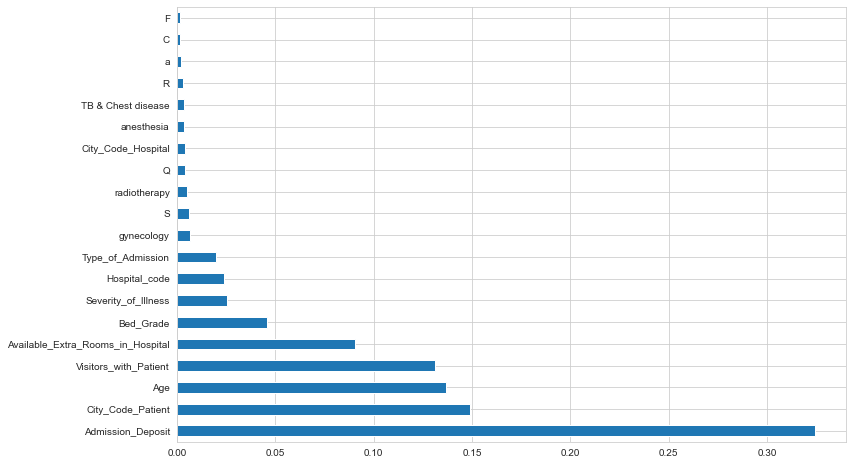

In [80]:
# plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [81]:
imp_features = feat_importances.nlargest(20)
imp_features

Admission_Deposit                    0.324124
City_Code_Patient                    0.149212
Age                                  0.136625
Visitors_with_Patient                0.131384
Available_Extra_Rooms_in_Hospital    0.090470
Bed_Grade                            0.045840
Severity_of_Illness                  0.025737
Hospital_code                        0.023992
Type_of_Admission                    0.020062
gynecology                           0.006550
S                                    0.005977
radiotherapy                         0.005349
Q                                    0.004124
City_Code_Hospital                   0.004118
anesthesia                           0.003771
TB & Chest disease                   0.003580
R                                    0.003024
a                                    0.001903
C                                    0.001586
F                                    0.001414
dtype: float64

In [82]:
imp_features.index

Index(['Admission_Deposit', 'City_Code_Patient', 'Age',
       'Visitors_with_Patient', 'Available_Extra_Rooms_in_Hospital',
       'Bed_Grade', 'Severity_of_Illness', 'Hospital_code',
       'Type_of_Admission', 'gynecology', 'S', 'radiotherapy', 'Q',
       'City_Code_Hospital', 'anesthesia', 'TB & Chest disease', 'R', 'a', 'C',
       'F'],
      dtype='object')

In [83]:
# Selecting the features with higher feature importance (20 features out of 38)

X = df.loc[:, ['Admission_Deposit', 'City_Code_Patient', 'Age',
       'Visitors_with_Patient', 'Available_Extra_Rooms_in_Hospital',
       'Bed_Grade', 'Severity_of_Illness', 'Hospital_code',
       'Type_of_Admission', 'gynecology', 'S', 'radiotherapy', 'Q',
       'City_Code_Hospital', 'anesthesia', 'TB & Chest disease', 'R', 'a', 'C',
       'F']]
X.head()

,Admission_Deposit,City_Code_Patient,Age,Visitors_with_Patient,Available_Extra_Rooms_in_Hospital,Bed_Grade,Severity_of_Illness,Hospital_code,Type_of_Admission,gynecology,S,radiotherapy,Q,City_Code_Hospital,anesthesia,TB & Chest disease,R,a,C,F
231676,6247,8.0,4,4,4,2.0,2,19,3,1,0,0,1,7,0,0,0,1,1,0
166821,8000,2.0,6,6,2,1.0,2,19,3,0,1,1,0,7,0,0,0,1,1,0
70566,4987,7.0,2,3,2,3.0,3,26,3,0,0,1,0,2,0,0,1,0,0,0
197982,7210,14.0,6,3,2,3.0,2,26,1,1,0,0,1,2,0,0,0,0,0,0
280389,3178,8.0,4,2,4,2.0,2,18,2,0,0,1,0,13,0,0,1,0,0,0


In [84]:
y = df.loc[:, ['Stay']]
y.head()

,Stay
231676,2
166821,10
70566,1
197982,6
280389,5


## Model building

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

### 1) Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth=5, random_state=50)
DT_model.fit(X_train, y_train)
y_predict = DT_model.predict(X_test)
print('Accuracy of Decision Tree: ', accuracy_score(y_test, y_predict))
print('F1 score:', f1_score(y_test, y_predict, average='weighted'))
print('Recall:', recall_score(y_test, y_predict, average='weighted'))
print('Precision:', precision_score(y_test, y_predict, average='weighted'))

# for multiclass problem, average='binary' needs to be changed to either of these ones: "None", "micro", "macro", "weighted"

Accuracy of Decision Tree:  0.3911725913829921
F1 score: 0.35208301743395726
Recall: 0.3911725913829921
Precision: 0.3543838053570111


c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
confusion_matrix(y_test,y_predict)

array([[ 510, 2457, 1734,   33,    0,   55,    0,    0,    0,    0,    0],
       [ 325, 9488, 4540,  536,    0,  770,    0,    0,    0,    0,    3],
       [ 232, 7741, 8848,  220,    0,  527,    0,    0,    0,    0,   13],
       [ 141, 3446, 3149, 2141,    0, 2123,    0,    0,    0,    0,   40],
       [  53,  906, 1016,   91,    0,  218,    0,    0,    0,    0,   22],
       [  51,  892,  825, 1590,    0, 3413,    0,    0,    0,    0,   85],
       [   9,  155,  215,   28,    0,  117,    0,    0,    0,    0,   12],
       [  20,  239,  174,  441,    0,  963,    0,    0,    0,    0,  213],
       [   7,   50,   32,  106,    0,  677,    0,    0,    0,    0,   80],
       [   8,   60,   54,  110,    0,  261,    0,    0,    0,    0,   88],
       [  12,  103,   52,  118,    0,  537,    0,    0,    0,    0,  513]],
      dtype=int64)

In [90]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.37      0.11      0.17      4789
           1       0.37      0.61      0.46     15662
           2       0.43      0.50      0.46     17581
           3       0.40      0.19      0.26     11040
           4       0.00      0.00      0.00      2306
           5       0.35      0.50      0.41      6856
           6       0.00      0.00      0.00       536
           7       0.00      0.00      0.00      2050
           8       0.00      0.00      0.00       952
           9       0.00      0.00      0.00       581
          10       0.48      0.38      0.43      1335

    accuracy                           0.39     63688
   macro avg       0.22      0.21      0.20     63688
weighted avg       0.35      0.39      0.35     63688



c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2) Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=1)
RF_model.fit(X_train, y_train)
y_predict = RF_model.predict(X_test)
print('Accuracy of Random Forest: ', accuracy_score(y_test, y_predict))
print('F1 score:', f1_score(y_test, y_predict, average='weighted'))
print('Recall:', recall_score(y_test, y_predict, average='weighted'))
print('Precision:', precision_score(y_test, y_predict, average='weighted'))

C:\Users\apurv\AppData\Local\Temp/ipykernel_10732/1586014708.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, y_train)


Accuracy of Random Forest:  0.38126491646778043
F1 score: 0.32533096586395915
Recall: 0.38126491646778043
Precision: 0.30566389693977114


c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
confusion_matrix(y_test,y_predict)

array([[    0,  2140,  2596,    31,     0,    22,     0,     0,     0,
            0,     0],
       [    0,  6390,  8115,   595,     0,   562,     0,     0,     0,
            0,     0],
       [    0,  4473, 12528,   224,     0,   356,     0,     0,     0,
            0,     0],
       [    0,  2106,  4864,  2338,     0,  1732,     0,     0,     0,
            0,     0],
       [    0,   500,  1508,   115,     0,   183,     0,     0,     0,
            0,     0],
       [    0,   630,  1437,  1763,     0,  3026,     0,     0,     0,
            0,     0],
       [    0,    76,   313,    41,     0,   106,     0,     0,     0,
            0,     0],
       [    0,   168,   339,   496,     0,  1047,     0,     0,     0,
            0,     0],
       [    0,    39,    56,   165,     0,   692,     0,     0,     0,
            0,     0],
       [    0,    30,   114,   113,     0,   324,     0,     0,     0,
            0,     0],
       [    0,    69,   112,   177,     0,   977,     0,    

In [93]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4789
           1       0.38      0.41      0.40     15662
           2       0.39      0.71      0.51     17581
           3       0.39      0.21      0.27     11040
           4       0.00      0.00      0.00      2306
           5       0.34      0.44      0.38      6856
           6       0.00      0.00      0.00       536
           7       0.00      0.00      0.00      2050
           8       0.00      0.00      0.00       952
           9       0.00      0.00      0.00       581
          10       0.00      0.00      0.00      1335

    accuracy                           0.38     63688
   macro avg       0.14      0.16      0.14     63688
weighted avg       0.31      0.38      0.33     63688



c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3) XGBoost Classifier

In [94]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_predict = XGB_model.predict(X_test)
print('Accuracy of XGBoost: ', accuracy_score(y_test, y_predict))
print('F1 score:', f1_score(y_test, y_predict, average='weighted'))
print('Recall:', recall_score(y_test, y_predict, average='weighted'))
print('Precision:', precision_score(y_test, y_predict, average='weighted'))

c:\python 39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python 39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python 39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost:  0.4257630950885567
F1 score: 0.3915276394063394
Recall: 0.4257630950885567
Precision: 0.40911207888567386


In [97]:
confusion_matrix(y_test,y_predict)

array([[ 510, 2457, 1734,   33,    0,   55,    0,    0,    0,    0,    0],
       [ 325, 9488, 4540,  536,    0,  770,    0,    0,    0,    0,    3],
       [ 232, 7741, 8848,  220,    0,  527,    0,    0,    0,    0,   13],
       [ 141, 3446, 3149, 2141,    0, 2123,    0,    0,    0,    0,   40],
       [  53,  906, 1016,   91,    0,  218,    0,    0,    0,    0,   22],
       [  51,  892,  825, 1590,    0, 3413,    0,    0,    0,    0,   85],
       [   9,  155,  215,   28,    0,  117,    0,    0,    0,    0,   12],
       [  20,  239,  174,  441,    0,  963,    0,    0,    0,    0,  213],
       [   7,   50,   32,  106,    0,  677,    0,    0,    0,    0,   80],
       [   8,   60,   54,  110,    0,  261,    0,    0,    0,    0,   88],
       [  12,  103,   52,  118,    0,  537,    0,    0,    0,    0,  513]],
      dtype=int64)

In [98]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.37      0.11      0.17      4789
           1       0.37      0.61      0.46     15662
           2       0.43      0.50      0.46     17581
           3       0.40      0.19      0.26     11040
           4       0.00      0.00      0.00      2306
           5       0.35      0.50      0.41      6856
           6       0.00      0.00      0.00       536
           7       0.00      0.00      0.00      2050
           8       0.00      0.00      0.00       952
           9       0.00      0.00      0.00       581
          10       0.48      0.38      0.43      1335

    accuracy                           0.39     63688
   macro avg       0.22      0.21      0.20     63688
weighted avg       0.35      0.39      0.35     63688



c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python 39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Among these algorithms, XGBoost gives a better performance. We have further increase it's performance by hyperparameter tuning.

### Hyperparameter tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [100]:
XGB_hypertuned_model = XGBClassifier()

In [101]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

In [102]:
XGB_RSCV = RandomizedSearchCV(XGB_hypertuned_model, param_distributions=param_grid, n_iter=10,
                            n_jobs=1, cv=2, scoring='neg_log_loss', random_state=42)

In [103]:
XGB_RSCV.fit(X,y)

[10:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down t

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                                              1.0],
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                

In [104]:
best_score = XGB_RSCV.best_score_
best_score

-1.5108580773711382

In [105]:
best_params = XGB_RSCV.best_params_
best_params

{'subsample': 0.9,
 'silent': False,
 'reg_lambda': 50.0,
 'n_estimators': 100,
 'min_child_weight': 7.0,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.25,
 'colsample_bytree': 1.0,
 'colsample_bylevel': 0.4}

In [106]:
# defining the best parameters generated from RandomizedSearchCV

XGB_new_model = XGBClassifier(subsample= 0.9,
 silent= False,
 reg_lambda= 50.0,
 n_estimators= 100,
 min_child_weight= 7.0,
 max_depth= 15,
 learning_rate= 0.1,
 gamma= 0.25,
 colsample_bytree= 1.0,
 colsample_bylevel= 0.4)

In [107]:
XGB_new_model.fit(X_train, y_train)
y_predict = XGB_new_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_predict))
print('F1 score:', f1_score(y_test, y_predict, average='weighted'))
print('Recall:', recall_score(y_test, y_predict, average='weighted'))
print('Precision:', precision_score(y_test, y_predict, average='weighted'))

[12:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.42533915337269185
F1 score: 0.39066209890763814
Recall: 0.42533915337269185
Precision: 0.4098423206702683


In [108]:
confusion_matrix(y_test,y_predict)

array([[  786,  2320,  1637,    34,     1,    11,     0,     0,     0,
            0,     0],
       [  458,  7843,  6122,   724,     2,   503,     0,     2,     3,
            0,     5],
       [  334,  4971, 11643,   307,     4,   279,     0,     3,    28,
            0,    12],
       [  194,  1839,  4518,  2610,     3,  1816,     0,    11,    15,
            0,    34],
       [   78,   416,  1458,   146,     2,   182,     0,     3,     4,
            0,    17],
       [   82,   464,  1001,  1671,     3,  3404,     0,    16,   126,
            0,    89],
       [   12,    64,   289,    51,     1,    97,     0,     3,     5,
            0,    14],
       [   29,   129,   206,   371,     0,  1073,     0,    46,    24,
            1,   171],
       [   10,    40,    40,    89,     1,   480,     0,     3,   185,
            0,   104],
       [   12,    24,    58,    79,     0,   299,     0,    10,    10,
            2,    87],
       [   19,    59,    70,    96,     0,   393,     0,    

In [109]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.39      0.16      0.23      4789
           1       0.43      0.50      0.46     15662
           2       0.43      0.66      0.52     17581
           3       0.42      0.24      0.30     11040
           4       0.12      0.00      0.00      2306
           5       0.40      0.50      0.44      6856
           6       0.00      0.00      0.00       536
           7       0.40      0.02      0.04      2050
           8       0.36      0.19      0.25       952
           9       0.67      0.00      0.01       581
          10       0.52      0.43      0.47      1335

    accuracy                           0.43     63688
   macro avg       0.38      0.25      0.25     63688
weighted avg       0.41      0.43      0.39     63688



Apart from accuracy, recall, precision & f1 score, **roc_auc score** is also a good metric to evaluate the performance of an imbalanced data.

In [110]:
y_predict_proba = XGB_new_model.predict_proba(X_test)

In [111]:
y_predict_proba

array([[0.04977833, 0.11497257, 0.4265332 , ..., 0.00281347, 0.00263245,
        0.00593028],
       [0.01195866, 0.20303665, 0.03413891, ..., 0.00598781, 0.00665111,
        0.0075273 ],
       [0.01767267, 0.31924126, 0.38616076, ..., 0.00263682, 0.0042153 ,
        0.00302422],
       ...,
       [0.04025336, 0.19484358, 0.43750486, ..., 0.00224651, 0.00170567,
        0.00183462],
       [0.02166557, 0.4434708 , 0.38613465, ..., 0.00178573, 0.0035038 ,
        0.00207111],
       [0.06099707, 0.47241488, 0.3041475 , ..., 0.00256004, 0.00274403,
        0.00327803]], dtype=float32)

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

In [113]:
# roc_auc score

roc_auc = roc_auc_score(y_test, y_predict_proba, multi_class='ovr')
roc_auc
 
# this being a multiclass problem, the default value of multi_class='raise' needs to be changed to either 'ovo' or 'ovr'

0.8079585603991969

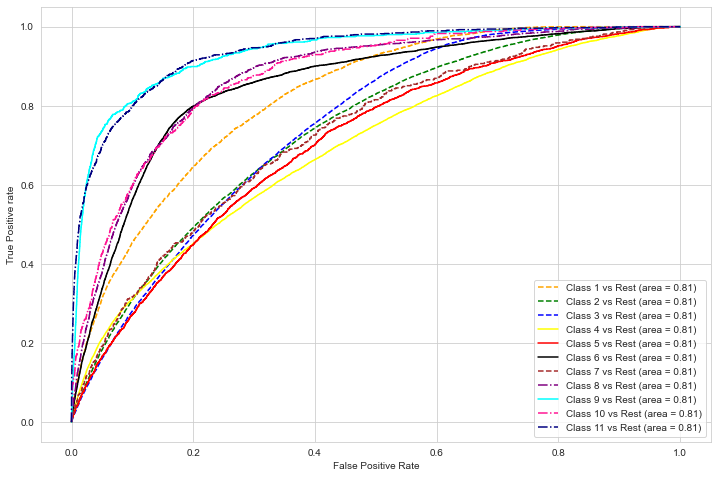

In [114]:
# roc curve for multiclass:

plt.figure(figsize = (12,8))

fpr = {}
tpr = {}
thresh ={}

n_class = 11

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_predict_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[3], tpr[3], linestyle='-', color='yellow', label='Class 4 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[4], tpr[4], linestyle='-',color='red', label='Class 5 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[5], tpr[5], linestyle='-',color='black', label='Class 6 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[6], tpr[6], linestyle='--', color='brown', label='Class 7 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[7], tpr[7], linestyle='-.',color='purple', label='Class 8 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[8], tpr[8], linestyle='-', color='cyan', label='Class 9 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[9], tpr[9], linestyle='-.', color='deeppink', label='Class 10 vs Rest (area = %0.2f)' % roc_auc)
plt.plot(fpr[10], tpr[10], linestyle='-.', color='navy', label='Class 11 vs Rest (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

The AUC score is 0.81. The higher the AUC (i.e. nearer to 1), the better. Since, here it is 0.81, this model is acceptable.

Hence, **XGBoost with hyperparameter tuning** yields better results for this use case.